In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


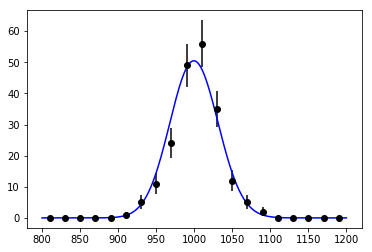

In [114]:
from scipy import stats
MU     = 1000
MIN    = 800
MAX    = 1200
NBINS  = 20
NTHROW = 200
DELTA  = float(MAX-MIN)/NBINS
s = np.random.poisson(MU, NTHROW)
counts,bins = np.histogram(s,range=(MIN,MAX),bins=NBINS)
cbins = (bins[:-1]+bins[1:])/2.0
err = counts**0.5
plt.errorbar(cbins,counts,fmt="ko",yerr=err)
xp=np.linspace(MIN,MAX,MAX-MIN+1)
yp=DELTA*NTHROW*stats.poisson.pmf(xp, MU)

plt.plot(xp,yp,"b-")




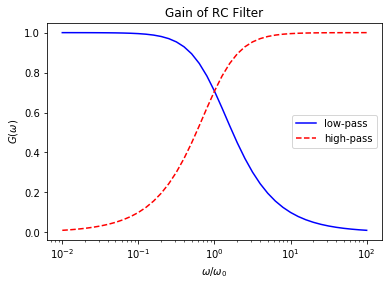

In [13]:
x = np.linspace(-2,2.0,4*10+1)
f = 10**x

ylp = 1.0/np.sqrt(1+f*f)
yhp = f/np.sqrt(1+f*f)
plt.xscale("log")
plt.plot(f,ylp,"b-",label="low-pass")
plt.plot(f,yhp,"r--",label="high-pass")
plt.xlabel("$\omega / \omega_0$")
plt.ylabel("$G(\omega)$")
plt.legend()
plt.title("Gain of RC Filter")
plt.savefig("rcgain.pdf")




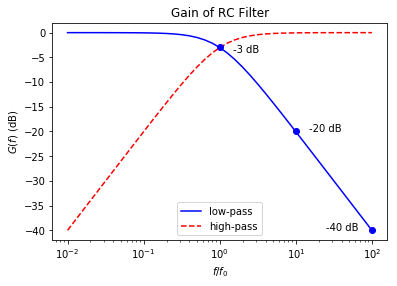

In [3]:
x = np.linspace(-2,2.0,4*10+1)
f=10**x

ylp = 20*np.log10(1.0/np.sqrt(1+f*f))
yhp = 20*np.log10(f/np.sqrt(1+f*f))
plt.xscale("log")
plt.plot(f,ylp,"b-",label="low-pass")
plt.plot(f,yhp,"r--",label="high-pass")
plt.xlabel("$f / f_0$")
plt.ylabel("$G(f)$ (dB)")
plt.legend()
plt.title("Gain of RC Filter")

plt.plot(1.0,-3,"bo")
plt.plot(10,-20,"bo")
plt.plot(100,-40,"bo")

plt.text(1.5*1.0,-4,"-3 dB")
plt.text(15,-20,"-20 dB")
plt.text(25,-40,"-40 dB")
plt.legend()
plt.savefig("rcgaindb.pdf")



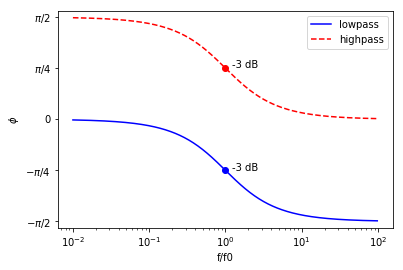

In [11]:
ff = np.arange(-2,2.,0.01)
ff = 10**ff
ya = -np.arctan(ff)
yb = np.arctan(1/ff)


fig = plt.figure()
ax  = fig.add_subplot(111)


unit   = 0.25
y_tick = np.arange(-0.5, 0.5+unit, unit)
y_label = [r"$-\pi/2$", r"$-\pi/4$", "0", r"$\pi/4$",   r"$\pi/2$"]
ax.set_yticks(y_tick*np.pi)
ax.set_yticklabels(y_label)

ax.set_ylim([-pi/2.0-0.1, pi/2.0+0.1])

ax.semilogx()
ax.plot(ff,ya,"-",label="lowpass", color="blue")
ax.plot(ff,yb,"--",label="highpass",color="red")
ax.set_xlabel("f/f0")
ax.set_ylabel("$\phi$")
ax.legend(loc=1)
plt.plot(1.0,-pi/4.0,"bo")
plt.plot(1.0,+pi/4.0,"ro")
plt.text(1.2,-pi/4.0,"-3 dB")
plt.text(1.2,+pi/4.0,"-3 dB")
fig.savefig("rcphase.pdf")



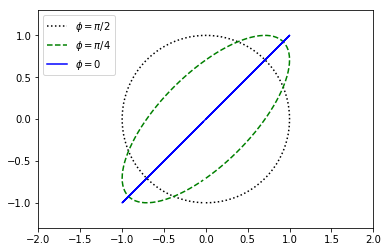

In [12]:
f = 5E3 # 5 kHz
phi = 0.25
w = 2*pi* f *(1E-6) # in units of 1/ms
t = np.arange(0,200,1, dtype=np.float)

ya = 1.0*sin(w*t)
yb = 1.0*sin(w*t-pi/2.0)
yc = 1.0*sin(w*t-pi/4.0)
yd = 1.0*sin(w*t)
plt.xlim(-2.,2.0)
plt.ylim(-1.5,1.5)
plt.plot(ya,yb,":",label=r'$\phi=\pi/2$',color="black")
plt.plot(ya,yc,"--",label="$\phi=\pi/4$",color="green")
plt.plot(ya,yd,"-",label="$\phi=0$",color="blue")
#plt.rc('text', usetex=False)
plt.gca().set_aspect('equal', 'datalim')
plt.legend(loc=2)
plt.savefig("scope_xy.pdf")

